# Eda Analysis on Titanic Dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Taking care of Missing values

In [3]:
sum = data.isnull().sum()
sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

In [5]:
sum = data.isnull().sum()
sum

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## PLotting how many males and females are survived

e:\Python\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


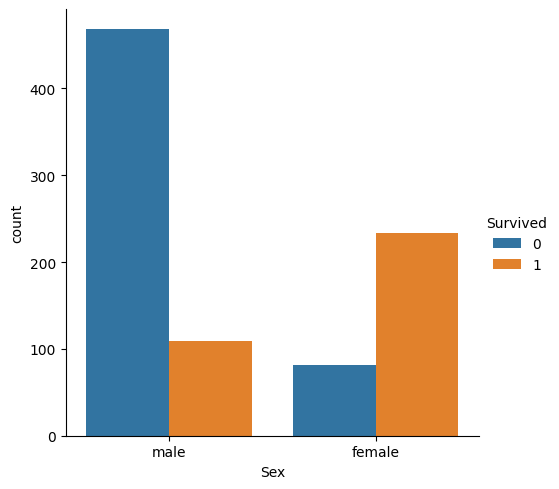

In [6]:
# Countplot 
sns.catplot(x ="Sex", hue ="Survived",  kind ="count", data = data) 

## Plotting how many are survived based on the class

<Axes: xlabel='Survived', ylabel='Pclass'>

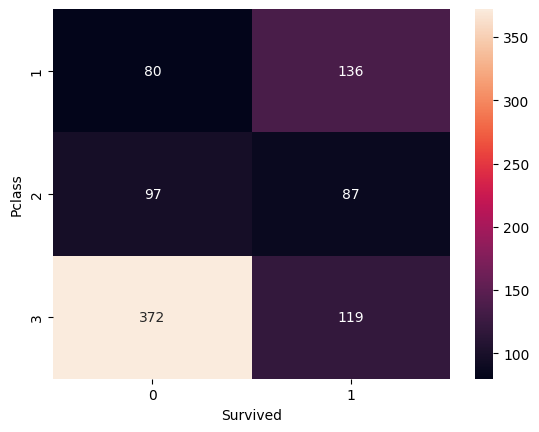

In [7]:
# Group the dataset by Pclass and Survived and then unstack them 
group = data.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
# Heatmap - Color encoded 2D representation of data. 
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

## Finding most Survived peoples age

<Axes: xlabel='Sex', ylabel='Age'>

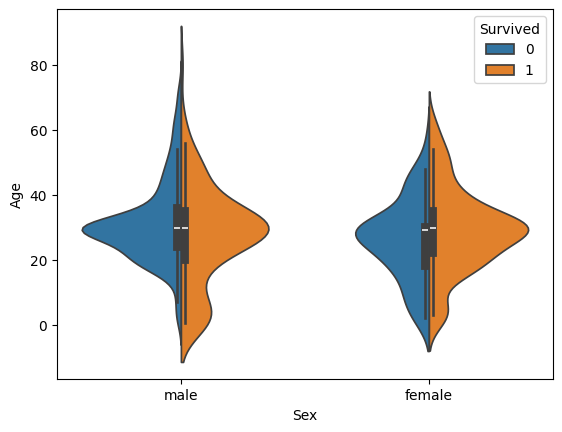

In [8]:
# Violinplot Displays distribution of data  
# across all levels of a category. 
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = data, split = True) 